# Final_invoice EDA
---

* imports

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import time

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

* fuctions

In [5]:
def map_others(text, intact_list):
    if text in intact_list:
        return text
    else:
        return 'Others'

* code

In [6]:
invoice = pd.read_csv('data/Final_invoice.csv', low_memory=False)

In [7]:
plant = pd.read_excel('data/Plant Master.xlsx')

In [8]:
invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492314 entries, 0 to 492313
Data columns (total 59 columns):
Unnamed: 0              492314 non-null int64
Amt Rcvd From Custom    295028 non-null float64
Amt Rcvd From Ins Co    295028 non-null float64
Area / Locality         468424 non-null object
CGST(14%)               295028 non-null float64
CGST(2.5%)              295028 non-null float64
CGST(6%)                295028 non-null float64
CGST(9%)                295028 non-null float64
CITY                    492313 non-null object
Cash /Cashless Type     27420 non-null object
Claim No.               4804 non-null object
Cust Type               492314 non-null object
Customer No.            492314 non-null object
District                492314 non-null object
Expiry Date             22231 non-null object
Gate Pass Date          40915 non-null object
Gate Pass Time          492314 non-null object
IGST(12%)               295028 non-null float64
IGST(18%)               295028 non-null fl

In [9]:
colums_delete = [
        'Unnamed: 0', 
        'Amt Rcvd From Custom', 'Amt Rcvd From Ins Co', 'CGST(14%)',
       'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)', 'IGST(12%)', 'IGST(18%)',
       'IGST(28%)', 'IGST(5%)', 'SGST/UGST(14%)',
       'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
       'Service Advisor Name', 'TDS amount',
       'Total CGST', 'Total GST', 'Total IGST', 'Total SGST/UGST', 'Pin code',
        'Insurance Company']

In [10]:
invoice.drop(colums_delete, axis=1, inplace=True)

In [11]:
plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 13 columns):
Plant                      438 non-null object
Name 1                     438 non-null object
Valuation Area             438 non-null object
Customer no. - plant       438 non-null object
Vendor number plant        2 non-null object
Factory calendar           438 non-null object
Name 2                     436 non-null object
House number and street    436 non-null object
PO Box                     437 non-null float64
Postal Code                438 non-null int64
City                       438 non-null object
Sales organization         433 non-null object
State                      438 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 44.6+ KB


In [12]:
plant_city_master = pd.DataFrame(plant.groupby(['Plant', 'City'])['City'].count())
plant_city_master.columns = ['Count'] 
plant_city_master.reset_index(inplace=True)
plant_city_master.drop('Count', axis=1, inplace=True)
plant_city_master_dict = plant_city_master.set_index('Plant').to_dict()
plant_city_master_dict = plant_city_master_dict['City']
plant_city_master_dict

{'BC07': 'Chennai',
 'BC30': 'Mohali',
 'X001': 'Thane',
 'X002': 'Ghaziabad',
 'X003': 'Bengaluru',
 'X005': 'Chennai',
 'X006': 'Thane',
 'X007': 'Bengaluru',
 'X008': 'Puducherry',
 'X010': 'Ranipet',
 'X011': 'Villupuram',
 'X012': 'Chidambaram',
 'X013': 'Neyveli',
 'X014': 'Ambur',
 'X016': 'Boripardhi',
 'X017': 'Kolhapur',
 'X018': 'Shirur',
 'X020': 'Coimbatore',
 'X021': 'Salem',
 'X022': 'Thanjavur',
 'X023': 'Tirupur',
 'X024': 'Tiruchirappalli',
 'X025': 'Moga',
 'X026': 'Pune',
 'X027': 'Pune',
 'X028': 'Ahmednagar',
 'X029': 'Zirakpur',
 'X031': 'Pollachi',
 'X032': 'Dharmapuri',
 'X033': 'Shimoga',
 'X034': 'Aurangabad',
 'X035': 'Pune',
 'X036': 'Madurai',
 'X037': 'Kurnool',
 'X039': 'Chennai',
 'X041': 'Meerut',
 'X042': 'Raipur',
 'X044': 'Dindigul',
 'X045': 'Rohtak',
 'X046': 'Jhajjar',
 'X047': 'Tirunelveli',
 'X048': 'Nagercoil',
 'X049': 'Tuticorin',
 'X050': 'Vadali Bhoi',
 'X051': 'Coimbatore',
 'X052': 'Madurai',
 'X053': 'Bhagpat',
 'X054': 'Ongole',
 'X055

In [13]:
plants_not_both = ['BC01',
 'BC02',
 'BC03',
 'BC05',
 'BC06',
 'BC08',
 'BC12',
 'BC13',
 'BC15',
 'BC16',
 'BC17',
 'BC18',
 'BC19',
 'BC20',
 'BC21',
 'BC22',
 'BC23',
 'BC24',
 'BC25',
 'BC26',
 'BC27',
 'BC28',
 'BC29',
 'BC31',
 'BC32',
 'BC33',
 'BC34',
 'BC04',
 'BC11']
plant_city_master_dict_rest = {}
for p in plants_not_both:
    plant_city_master_dict[p] = invoice[invoice.Plant == p]['Plant Name1'].unique()[0]
    

In [14]:
# plant.groupby(['Plant', 'State'])['State'].count()

In [15]:
invoice['plant_city'] = invoice['Plant'].map(lambda x: plant_city_master_dict[x].upper())



In [16]:
invoice['plant_city']\
    .value_counts()[:10]

NASHIK                    31401
THANE                     21871
CHENNAI                   21675
NAGPUR                    15778
PUNE                      14301
COIMBATORE                14244
MADEENAGUDA               13323
GUINDY                    12752
VAPI                      10732
MOHAN NAGAR - GAZIABAD    10259
Name: plant_city, dtype: int64

In [17]:
plant_state_master = pd.DataFrame(plant.groupby(['Plant', 'State'])['State'].count())
plant_state_master.columns = ['Count'] 
plant_state_master.reset_index(inplace=True)
plant_state_master.drop('Count', axis=1, inplace=True)
plant_state_master_dict = plant_state_master.set_index('Plant').to_dict()
plant_state_master_dict = plant_state_master_dict['State']
plant_state_master_dict

{'BC07': 'Tamil Nadu',
 'BC30': 'Punjab',
 'X001': 'Maharashtra',
 'X002': 'Uttar Pradesh',
 'X003': 'Karnataka',
 'X005': 'Tamil Nadu',
 'X006': 'Maharashtra',
 'X007': 'Karnataka',
 'X008': 'Puducherry',
 'X010': 'Tamil Nadu',
 'X011': 'Tamil Nadu',
 'X012': 'Tamil Nadu',
 'X013': 'Tamil Nadu',
 'X014': 'Tamil Nadu',
 'X016': 'Maharashtra',
 'X017': 'Maharashtra',
 'X018': 'Maharashtra',
 'X020': 'Tamil Nadu',
 'X021': 'Tamil Nadu',
 'X022': 'Tamil Nadu',
 'X023': 'Tamil Nadu',
 'X024': 'Tamil Nadu',
 'X025': 'Punjab',
 'X026': 'Maharashtra',
 'X027': 'Maharashtra',
 'X028': 'Maharashtra',
 'X029': 'Punjab',
 'X031': 'Tamil Nadu',
 'X032': 'Tamil Nadu',
 'X033': 'Karnataka',
 'X034': 'Maharashtra',
 'X035': 'Maharashtra',
 'X036': 'Tamil Nadu',
 'X037': 'Andhra Pradesh',
 'X039': 'Tamil Nadu',
 'X041': 'Uttar Pradesh',
 'X042': 'Chhattisgarh',
 'X044': 'Tamil Nadu',
 'X045': 'Haryana',
 'X046': 'Haryana',
 'X047': 'Tamil Nadu',
 'X048': 'Tamil Nadu',
 'X049': 'Tamil Nadu',
 'X050': '

In [18]:
len(plant_state_master_dict)

438

In [19]:
# nl_states = {}
for p in plants_not_both:
    temp = invoice[invoice.Plant==p].groupby(['Plant','plant_city'])['District'].value_counts()\
          .sort_values(ascending=False)
    temp = pd.DataFrame(temp)
    temp.columns = ['VC']      
    temp.reset_index(inplace=True)
    temp2= temp.loc[0,['Plant','plant_city','District']]
    plant_state_master_dict[temp2['Plant']] = temp2['District']

In [20]:
plant_state_master_dict['BC05'] = 'Telangana'
plant_state_master_dict['BC12'] = 'Telangana'

In [21]:
len(plant_state_master_dict)

467

In [22]:
467-438 #check count

29

In [23]:
invoice['plant_state'] = invoice['Plant'].map(lambda x: plant_state_master_dict[x])

In [24]:
invoice['plant_state']\
    .value_counts()

Maharashtra         130210
Tamil Nadu          114350
Karnataka            44306
Uttar Pradesh        35971
Gujarat              25901
Telangana            25832
Punjab               23989
Andhra Pradesh       22467
Haryana              20171
Madhya Pradesh       13690
Rajasthan            13346
Kerala                5750
Himachal Pradesh      3974
Bihar                 3390
Uttarakhand           2628
Odisha                2327
Puducherry            1779
West Bengal           1306
Chhattisgarh           598
Jharkhand              177
Assam                   92
Chandigarh              60
Name: plant_state, dtype: int64

In [25]:
# invoice['plant_city'] = invoice['plant_city'].map(lambda x: x.upper())

In [26]:
#fill NAN with 0
invoice['Total Value'] = invoice['Total Value'].fillna(0)

In [27]:
order_agg = invoice.groupby(['Order Type'])['Total Value'].agg(['count','sum','mean'])
order_agg = order_agg.sort_values('sum', ascending=False)

In [28]:
order_agg = order_agg.reset_index()

In [29]:
order_agg['or_ct'] = order_agg['Order Type']+' \nCount: '+order_agg['count'].astype(str)
order_agg

Order Type   count           sum         mean  \
0    Running Repairs  269455  4.425518e+08  1642.395971   
1         Accidental   44159  4.414085e+08  9995.889070   
2       Paid Service  135004  3.873247e+08  2868.987100   
3  SMC Value Package    9781  3.050636e+07  3118.941228   
4     SMC Redemption   15738  1.674224e+06   106.381010   
5       Repeat Order    3043  4.006740e+03     1.316707   
6         Mechanical   15100  0.000000e+00     0.000000   
7          WBW Order      17  0.000000e+00     0.000000   
8    Workshop Damage      17  0.000000e+00     0.000000   

                             or_ct  
0  Running Repairs \nCount: 269455  
1        Accidental \nCount: 44159  
2     Paid Service \nCount: 135004  
3  SMC Value Package \nCount: 9781  
4    SMC Redemption \nCount: 15738  
5       Repeat Order \nCount: 3043  
6        Mechanical \nCount: 15100  
7            WBW Order \nCount: 17  
8      Workshop Damage \nCount: 17

In [30]:
invoice['Order Type'].value_counts(normalize=True)*100

Running Repairs      54.732346
Paid Service         27.422336
Accidental            8.969682
SMC Redemption        3.196740
Mechanical            3.067148
SMC Value Package     1.986740
Repeat Order          0.618101
Workshop Damage       0.003453
WBW Order             0.003453
Name: Order Type, dtype: float64

In [31]:
order_others = ['Repeat Order', 'Workshop Damage', 'WBW Order']
order_vc = pd.DataFrame(invoice['Order Type'].map(lambda x: x if x not in order_others else 'Others').value_counts(normalize=True)*100)
order_vc

Order Type
Running Repairs     54.732346
Paid Service        27.422336
Accidental           8.969682
SMC Redemption       3.196740
Mechanical           3.067148
SMC Value Package    1.986740
Others               0.625008

In [32]:

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(
                             labels=order_vc.index,
                             values=order_vc['Order Type'],
                             hole=0.5,
                             textposition = 'outside',
                             textinfo='label+percent',
                             marker=dict( line=dict(color='#000000', width=2))
                                             )])
fig.update_layout(
#     colors=colors,
    showlegend=True,
    legend={
        'x':1.25,
        'y':.75
            },
    title={
        'text': "Distribution of Order Types",
        'y':.9,
        'x':.4,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=700,
    height=500
)
# fig.layout.template = 'plotly_dark'

fig.show()


In [33]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig = go.Figure(data=[
    go.Bar(name='Total Revenue', x=order_agg['Order Type'], y=order_agg['sum']
           , yaxis='y', offsetgroup=1
           , text = order_agg['sum'].astype(int), textposition='outside', texttemplate='%{text:.2s}'),
    go.Bar(name='Average Revenue', x=order_agg['Order Type'], y=order_agg['mean']
           , yaxis='y2', offsetgroup=2, marker_color= 'mediumturquoise'#, marker_color='rgb(65,68,139)' 
           , text = order_agg['mean'].astype(int), textposition='outside', texttemplate='%{text:.2s}')
                    ],

    layout={
        'yaxis': {'title': 'Total Revenue'},
        'yaxis2': {'title': 'Average Revenue', 'overlaying': 'y', 'side': 'right'}
    }
        )
# fig.update_layout(barmode='group')
# fig.update_traces(marker_color=['gold']*len(order_agg['Order Type']), marker_line_color='rgb(8,48,107)',
#                   marker_line_width=1.5, opacity=0.6)
fig.layout.template = 'plotly_white'
fig.update_layout(
    title={
        'text': "Total and average for all Order Types",
        'y':.9,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)    
fig.show()
# fig.write_html("/Users/Aniket/MyStuff/Study/GreyAtom/CapstoneProject/plots/Revenue_agg_order_bar2.html")

In [34]:
invoice.plant_city.value_counts()[:50]

NASHIK                     31401
THANE                      21871
CHENNAI                    21675
NAGPUR                     15778
PUNE                       14301
COIMBATORE                 14244
MADEENAGUDA                13323
GUINDY                     12752
VAPI                       10732
MOHAN NAGAR - GAZIABAD     10259
SURAT UDHANA                9990
FARIDABAD 1                 9521
NELLORE                     8723
BELLANDUR - BANGALORE       8343
NOIDA - 63                  8053
BENGALURU                   7649
PIMPRI - PUNE               7483
MOHALI                      7403
YESHWANTPUR - BANGALORE     6655
HYDERABAD L B NAGAR         6577
MADURAI                     6459
AMBATTUR - CHENNAI          5946
MANGALORE                   5928
HINJAWADI – PUNE            5888
HADAPSAR - PUNE             5812
MOGA                        5497
NOIDA - 05                  5244
NERUL - NAVI MUMBAI         5103
NEYVELI                     4971
GREATER NOIDA               4911
PANCHKULLA

In [35]:
for text in invoice.plant_city.unique():
# for l in ['thane', 'thane w', 'thnae', 'pune']:
    temp = re.findall('pune',str(text),flags=re.I)
    if len(temp)!=0:
        print(text)
        print(invoice[invoice.plant_city==text]['Plant'].value_counts())
        print('---')

PUNE
BC02    8209
X035    2385
X027    1955
X146     704
X173     657
X026     391
Name: Plant, dtype: int64
---
HADAPSAR - PUNE
BC19    5812
Name: Plant, dtype: int64
---
HINJAWADI – PUNE
BC24    5888
Name: Plant, dtype: int64
---
PIMPRI - PUNE
BC34    7483
Name: Plant, dtype: int64
---
PUNE-HINJEWADI
X437    20
Name: Plant, dtype: int64
---


In [36]:
# kochi

for text in invoice.plant_city.unique():
# for l in ['thane', 'thane w', 'thnae', 'pune']:
    temp = re.findall('kochi',str(text),flags=re.I)
    if len(temp)!=0:
        print(text)
        print(invoice[invoice.plant_city==text]['Plant'].value_counts())
        print('---')

EDAPPALLY - KOCHI
BC21    3506
Name: Plant, dtype: int64
---
KOCHI
X124    865
Name: Plant, dtype: int64
---


In [37]:
# ludhiana

for text in invoice.plant_city.unique():
# for l in ['thane', 'thane w', 'thnae', 'pune']:
    temp = re.findall('ludhiana',str(text),flags=re.I)
    if len(temp)!=0:
        print(text)
        print(invoice[invoice.plant_city==text]['Plant'].value_counts())
        print('---')

GT ROAD - LUDHIANA
BC27    3347
Name: Plant, dtype: int64
---
GILL ROAD - LUDHIANA
BC32    3387
Name: Plant, dtype: int64
---


In [38]:
# mumbai

for text in invoice.plant_city.unique():
# for l in ['thane', 'thane w', 'thnae', 'pune']:
    temp = re.findall('mumbai',str(text),flags=re.I)
    if len(temp)!=0:
        print(text)

NERUL - NAVI MUMBAI


In [39]:
#city cleaning

In [66]:
invoice.plant_city.unique()

# NOIDA, PUNE, CHENNAI, LUDHIANA, NAVI MUMBAI, HYDERABAD, SURAT, KOCHI, BANGALORE, 

array(['THANE', 'PUNE', 'NASHIK', 'MADEENAGUDA', 'GUINDY', 'CHENNAI',
       'VAPI', 'HYDERABAD L B NAGAR', 'SURAT UDHANA',
       'BELLANDUR - BANGALORE', 'AMBATTUR - CHENNAI', 'NELLORE',
       'COIMBATORE', 'HADAPSAR - PUNE', 'MOHAN NAGAR - GAZIABAD',
       'EDAPPALLY - KOCHI', 'GREATER NOIDA', 'FARIDABAD 1',
       'HINJAWADI – PUNE', 'NERUL - NAVI MUMBAI', 'NAGPUR',
       'GT ROAD - LUDHIANA', 'NOIDA - 63', 'NOIDA - 05', 'MOHALI',
       'YESHWANTPUR - BANGALORE', 'GILL ROAD - LUDHIANA', 'PANCHKULLA',
       'PIMPRI - PUNE', 'PUDUCHERRY', 'RANIPET', 'VILLUPURAM',
       'CHIDAMBARAM', 'NEYVELI', 'AMBUR', 'KOLHAPUR', 'SALEM',
       'THANJAVUR', 'TIRUCHIRAPPALLI', 'MOGA', 'ZIRAKPUR', 'AURANGABAD',
       'MADURAI', 'KURNOOL', 'MEERUT', 'BORIPARDHI', 'SHIRUR',
       'AHMEDNAGAR', 'TUTICORIN', 'BENGALURU', 'CHHINDWARA', 'TIRUPUR',
       'POLLACHI', 'DHARMAPURI', 'RAIPUR', 'ROHTAK', 'ONGOLE',
       'RISHIKESH', 'ABOHAR', 'SHIMOGA', 'CHENGALPATTU', 'UNA',
       'RAJAHMUNDRY', 'SO

In [84]:
def clean_city(text):
    clct = ['NOIDA', 'PUNE', 'CHENNAI', 'LUDHIANA', 'HYDERABAD', 'SURAT', 'KOCHI', 'BANGALORE']
    for ct in clct:
        if ct in text:
            return ct
    return text

In [85]:
clean_city('HINJAWADI – PUNE')

'PUNE'

In [86]:
'PUNE' in 'HINJAWADI – PUNE'

True

In [87]:
invoice['plant_city'] = invoice.plant_city.map(lambda x: clean_city(x))

In [88]:
invoice.plant_city.unique()


array(['THANE', 'PUNE', 'NASHIK', 'MADEENAGUDA', 'GUINDY', 'CHENNAI',
       'VAPI', 'HYDERABAD', 'SURAT', 'BANGALORE', 'NELLORE', 'COIMBATORE',
       'MOHAN NAGAR - GAZIABAD', 'KOCHI', 'NOIDA', 'FARIDABAD 1',
       'NERUL - NAVI MUMBAI', 'NAGPUR', 'LUDHIANA', 'MOHALI',
       'PANCHKULLA', 'PUDUCHERRY', 'RANIPET', 'VILLUPURAM', 'CHIDAMBARAM',
       'NEYVELI', 'AMBUR', 'KOLHAPUR', 'SALEM', 'THANJAVUR',
       'TIRUCHIRAPPALLI', 'MOGA', 'ZIRAKPUR', 'AURANGABAD', 'MADURAI',
       'KURNOOL', 'MEERUT', 'BORIPARDHI', 'SHIRUR', 'AHMEDNAGAR',
       'TUTICORIN', 'BENGALURU', 'CHHINDWARA', 'TIRUPUR', 'POLLACHI',
       'DHARMAPURI', 'RAIPUR', 'ROHTAK', 'ONGOLE', 'RISHIKESH', 'ABOHAR',
       'SHIMOGA', 'CHENGALPATTU', 'UNA', 'RAJAHMUNDRY', 'SONEPAT',
       'THIRUPATHI', 'SHRIGONDA', 'KOTTAYAM', 'NAGERCOIL', 'HASSAN',
       'KHAMMAM', 'HISAR', 'AGRA', 'TIRUNELVELI', 'MYSORE', 'ANANTAPUR',
       'INDORE', 'VIJAYAWADA', 'MANGALORE', 'CHOMU', 'DINDIGUL', 'PALANI',
       'KOLAR', 'INDAPUR',

In [40]:
# #count of all plants acc. states
# plants_country_count = pd.DataFrame(plant.State.value_counts())
# print(plants_country_count)
# fig = go.Figure(data=[
#     go.Bar(name='Plants Count', x=plants_country_count.index, y=plants_country_count['State']
#            ,text = plants_country_count['State'].astype(str), textposition='outside'),
    
#                     ],

    
#         )

# fig.layout.template = 'plotly_white'
# fig.update_layout(
#     title={
#         'text': "Count of Plants accross all states",
#         'y':.9,
#         'x':.5,
#         'xanchor': 'center',
#         'yanchor': 'top'},
# )  
# fig.show()

In [41]:
invoice[invoice.plant_state=='maharashtra'].plant_city.value_counts()

Series([], Name: plant_city, dtype: int64)

State: Maharashtra
City: NASHIK


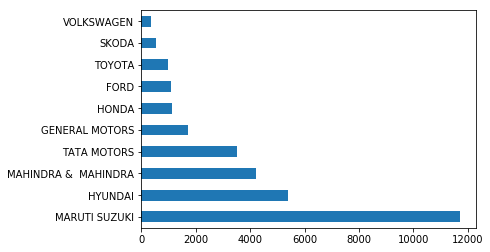

---
City: THANE


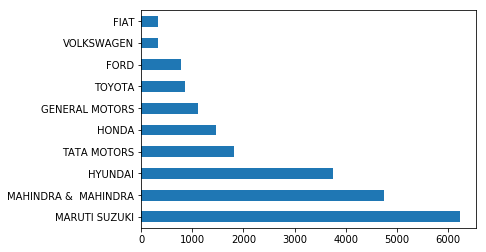

---
City: NAGPUR


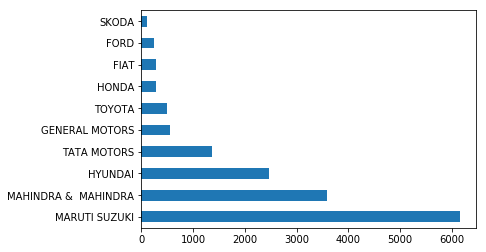

---
City: PUNE


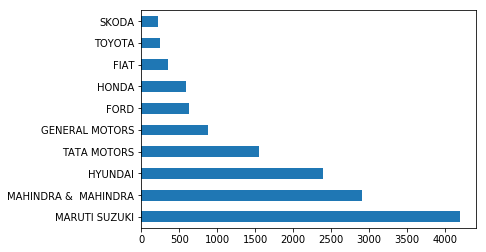

---
City: PIMPRI - PUNE


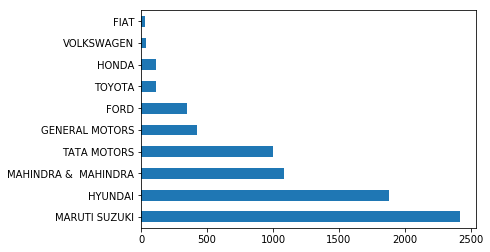

---
State: Telangana
City: MADEENAGUDA


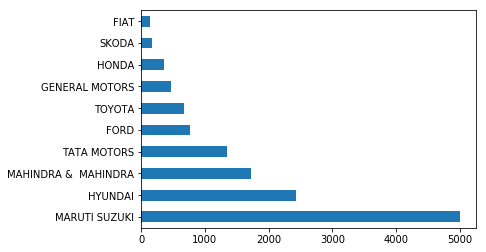

---
City: HYDERABAD L B NAGAR


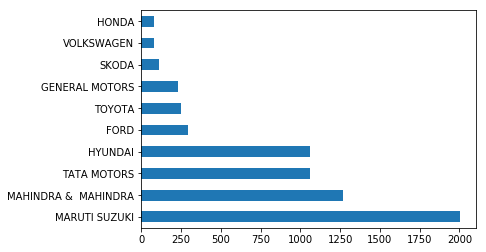

---
City: HYDERABAD


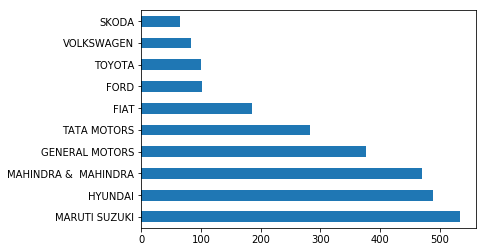

---
City: KHAMMAM


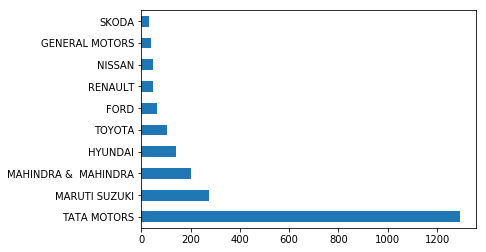

---
City: NIZAMABAD


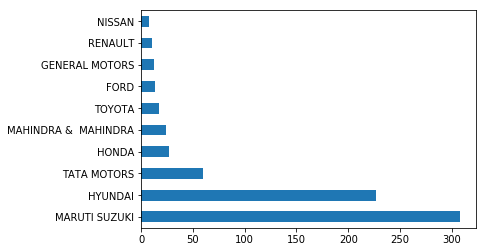

---
State: Tamil Nadu
City: CHENNAI


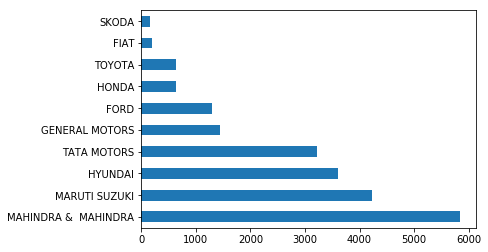

---
City: COIMBATORE


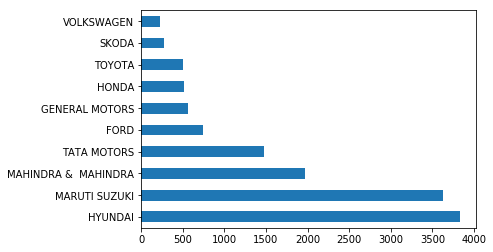

---
City: GUINDY


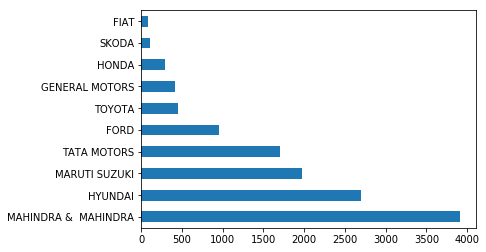

---
City: MADURAI


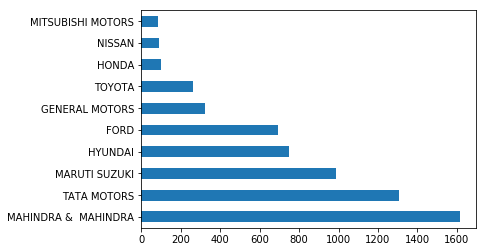

---
City: AMBATTUR - CHENNAI


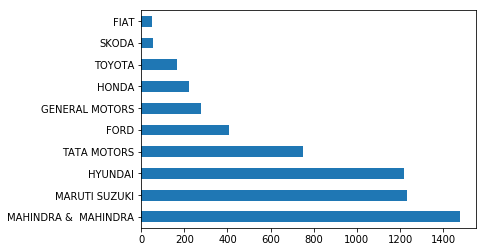

---
State: Gujarat
City: VAPI


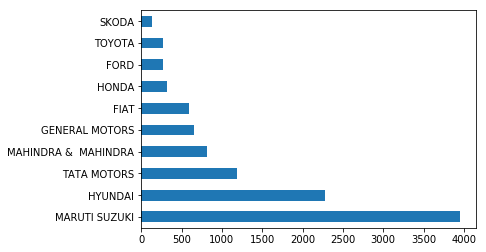

---
City: SURAT UDHANA


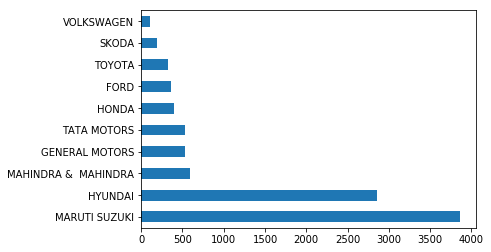

---
City: SURAT


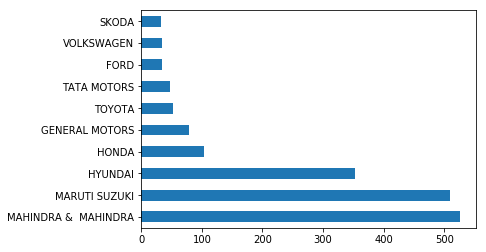

---
City: VADODARA


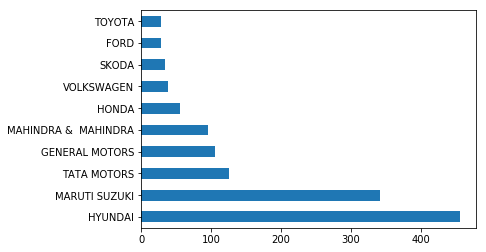

---
City: MEHSANA


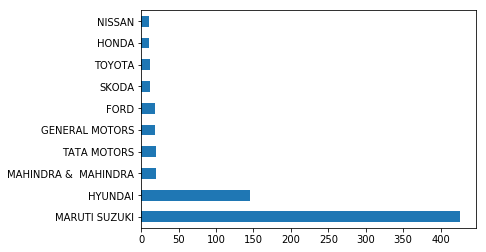

---
State: Karnataka
City: BELLANDUR - BANGALORE


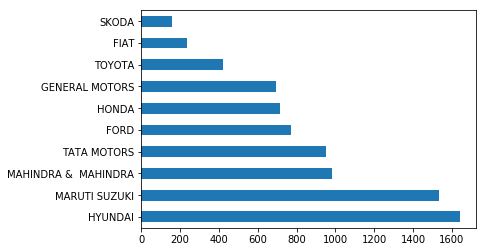

---
City: BENGALURU


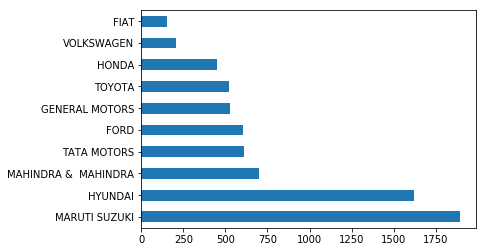

---
City: YESHWANTPUR - BANGALORE


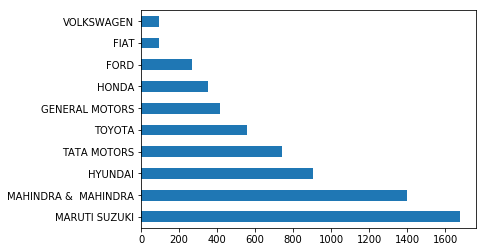

---
City: MANGALORE


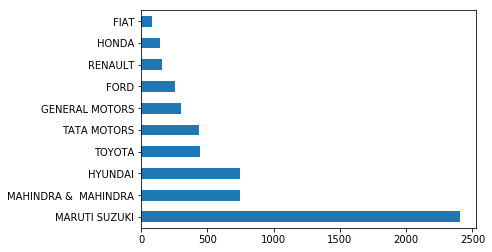

---
City: MYSORE


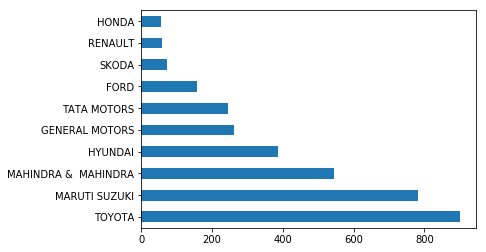

---
State: Andhra Pradesh
City: NELLORE


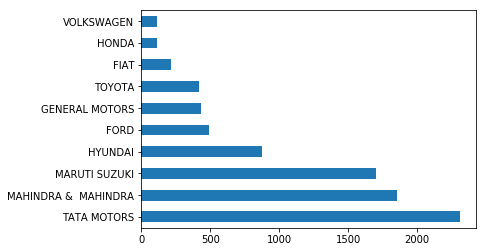

---
City: BALANAGAR


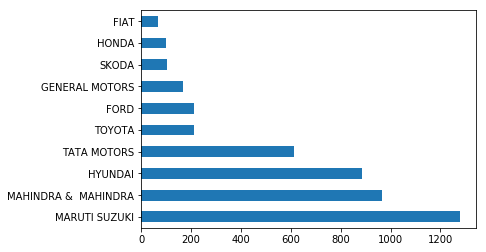

---
City: ONGOLE


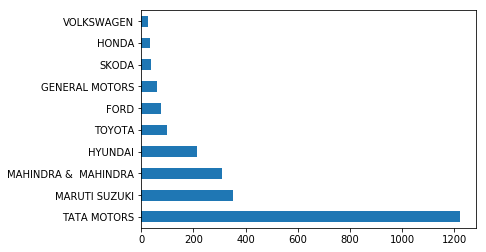

---
City: ANANTAPUR


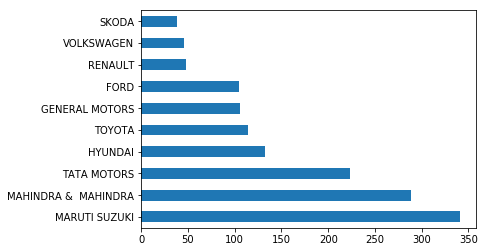

---
City: KAKINADA


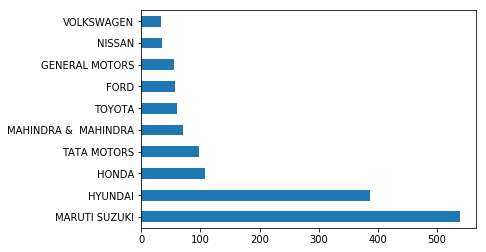

---
State: Uttar Pradesh
City: MOHAN NAGAR - GAZIABAD


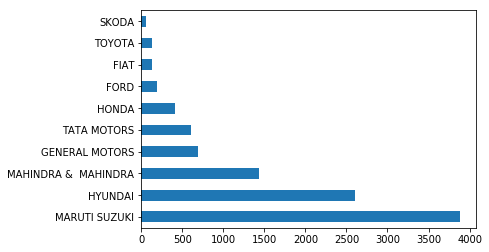

---
City: NOIDA - 63


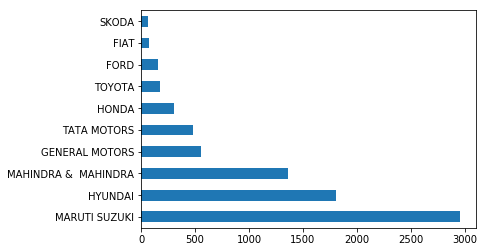

---
City: NOIDA - 05


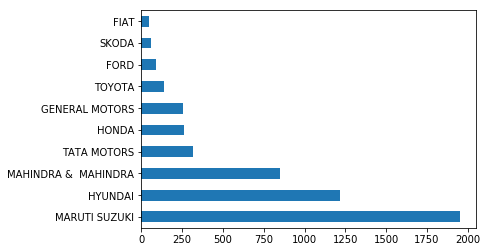

---
City: GREATER NOIDA


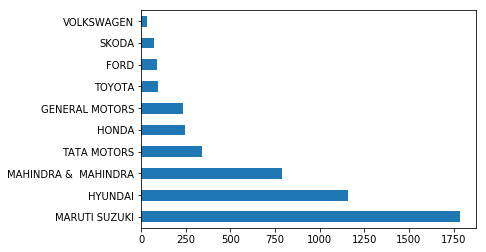

---
City: VARANASI


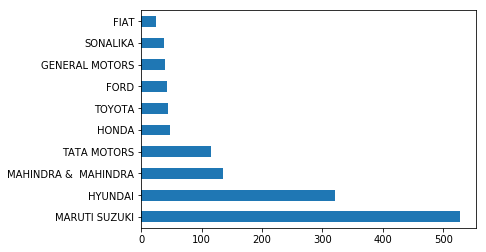

---
State: Kerala
City: EDAPPALLY - KOCHI


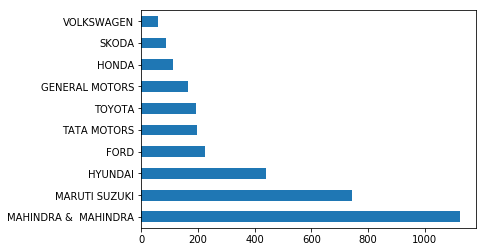

---
City: KOTTAKKAL


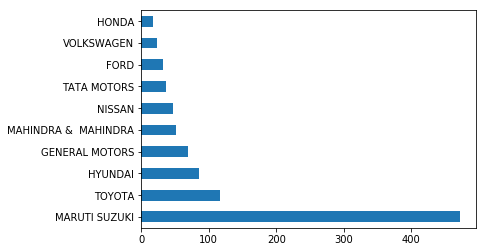

---
City: KOCHI


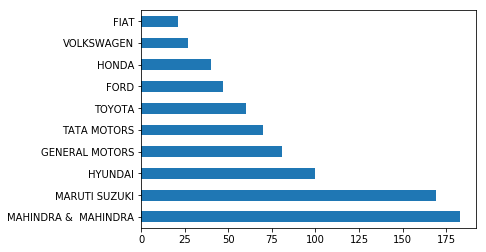

---
City: KOTTAYAM


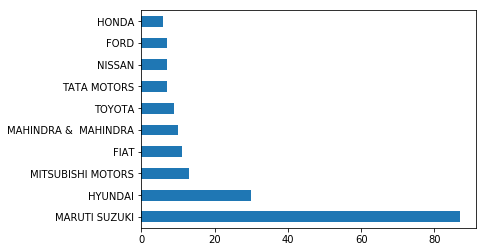

---
City: KOTAYYAM


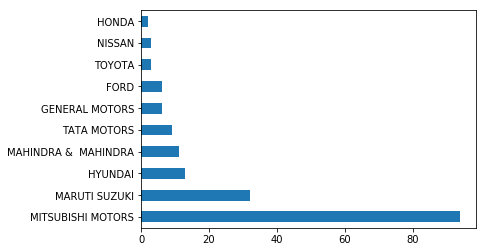

---
State: Haryana
City: FARIDABAD 1


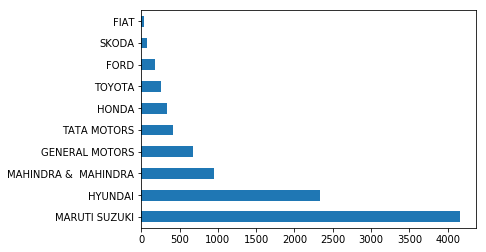

---
City: PANCHKULLA


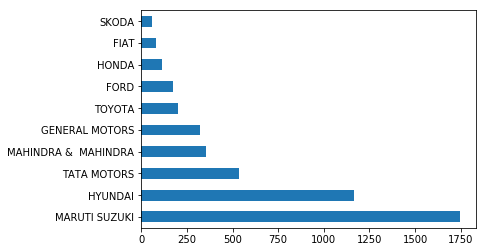

---
City: JHAJJAR


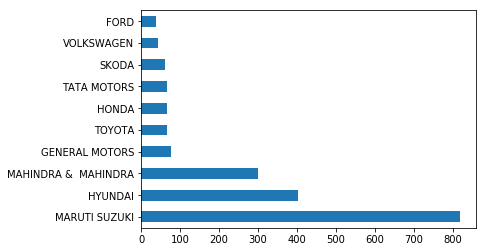

---
City: PINJORE


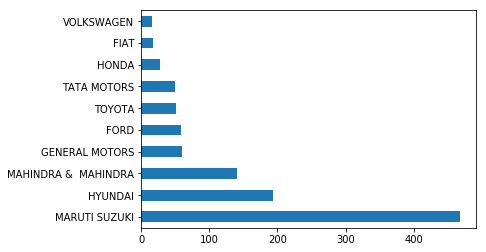

---
City: HISAR


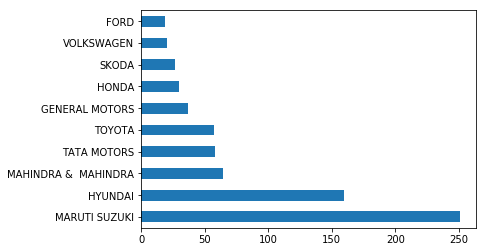

---
State: Punjab
City: MOHALI


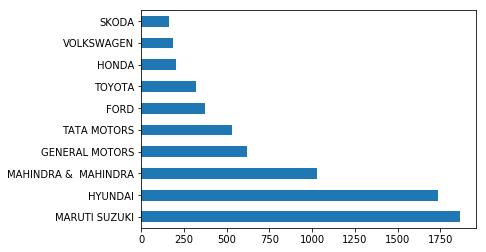

---
City: MOGA


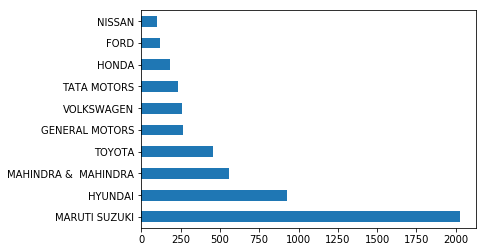

---
City: GILL ROAD - LUDHIANA


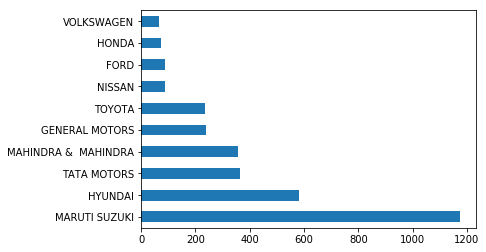

---
City: GT ROAD - LUDHIANA


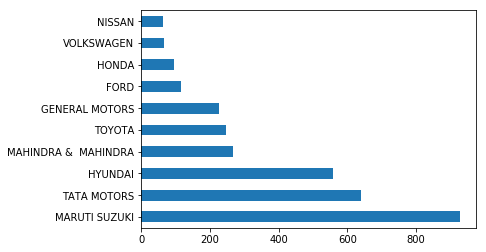

---
City: ZIRAKPUR


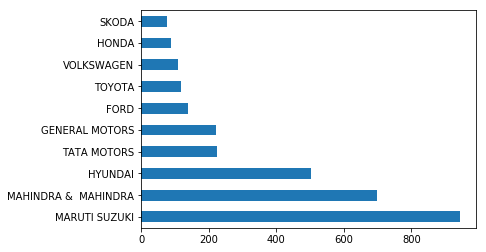

---
State: Puducherry
City: PUDUCHERRY


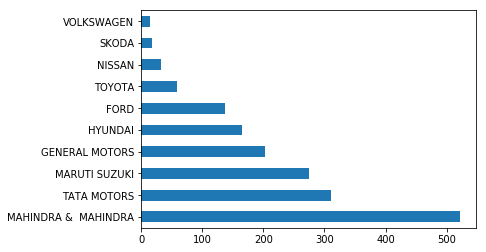

---
State: Madhya Pradesh
City: BHOPAL


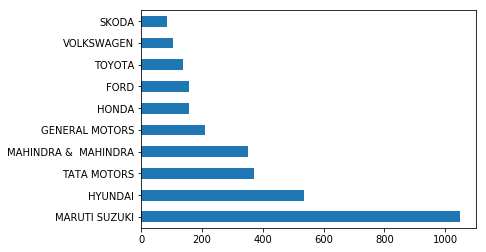

---
City: NEEMUCH


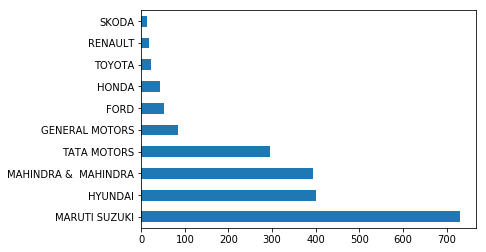

---
City: CHHINDWARA


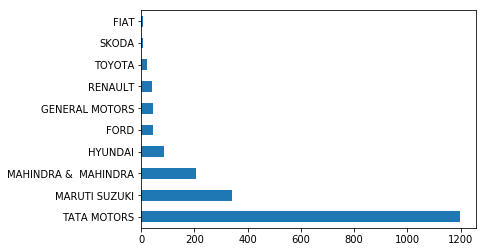

---
City: INDORE


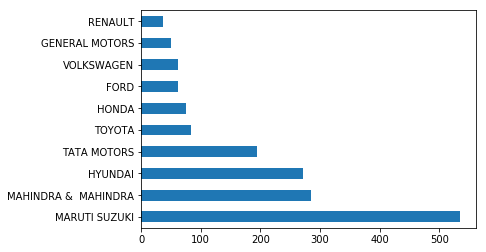

---
City: RATLAM


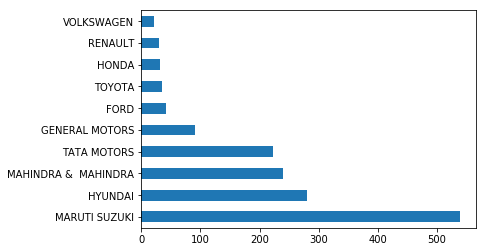

---
State: Chhattisgarh
City: RAIPUR


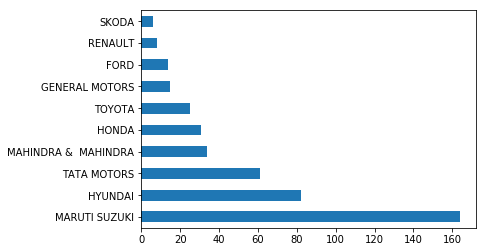

---
City: AMBIKAPUR


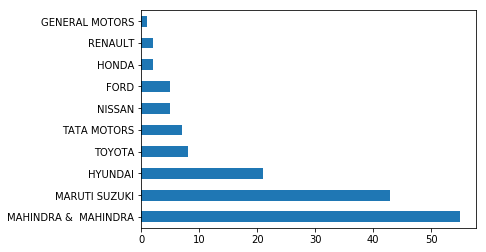

---
State: Uttarakhand
City: RUDRAPUR


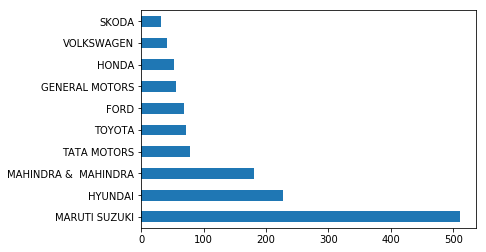

---
City: RAMNAGAR


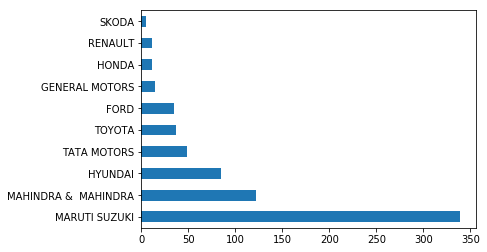

---
City: KASHIPUR


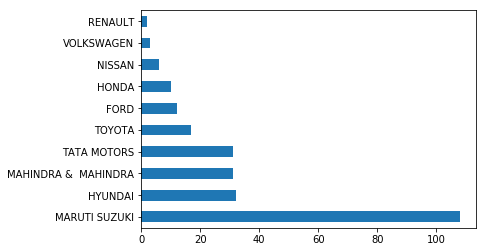

---
City: HALDWANI


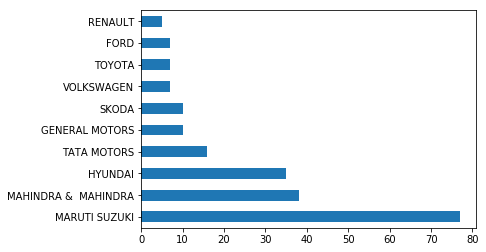

---
City: RISHIKESH


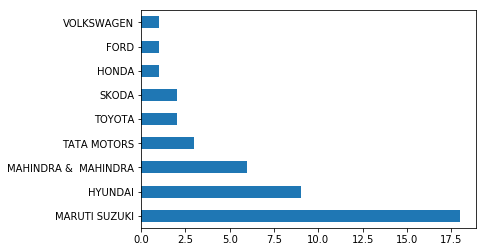

---
State: Himachal Pradesh
City: UNA


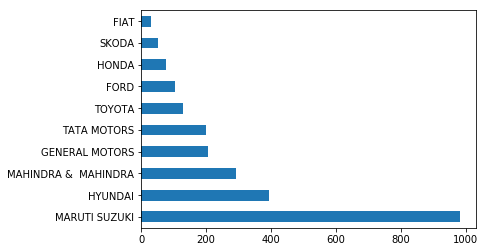

---
City: BILASPUR


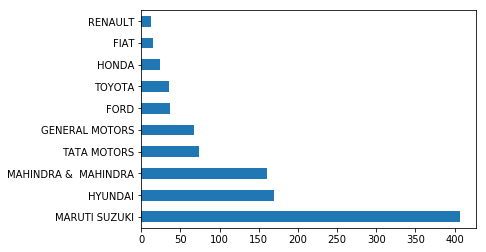

---
City: KULLU


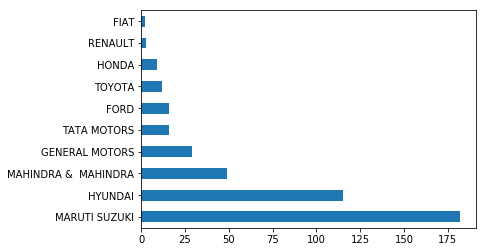

---
State: Rajasthan
City: CHOMU


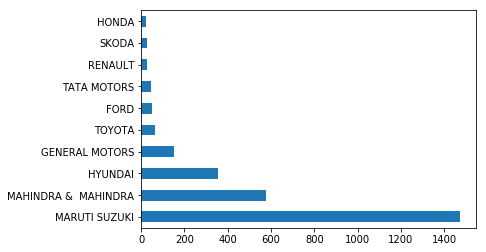

---
City: JAIPUR


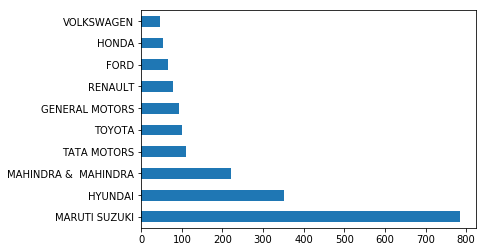

---
City: JODHPUR


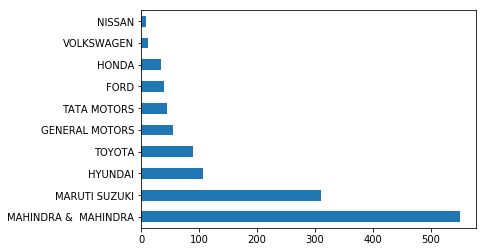

---
City: BIKANER


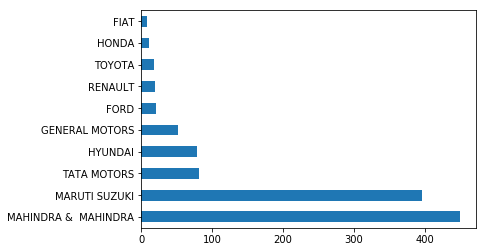

---
City: JHUNJHUNU


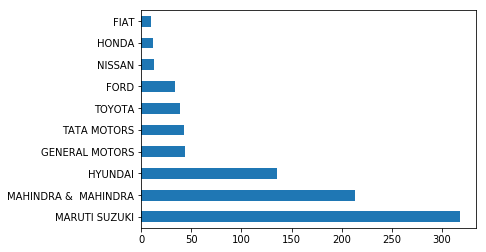

---
State: Bihar
City: PATNA


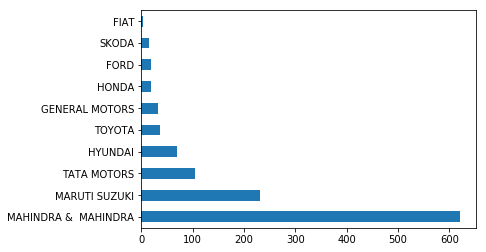

---
City: BEGUSARAI


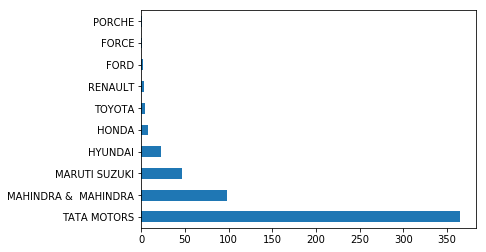

---
City: BHAGALPUR


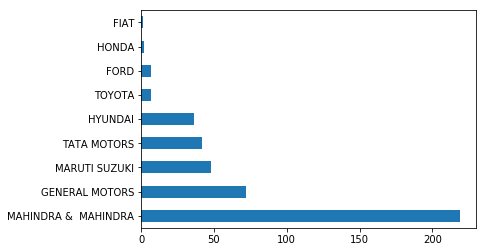

---
City: MOHANIA


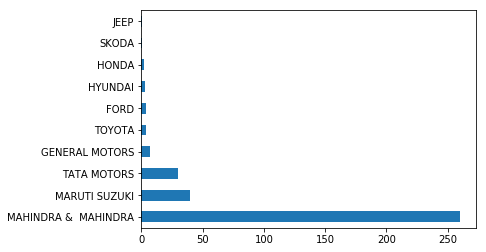

---
City: BIKRAMGANJ


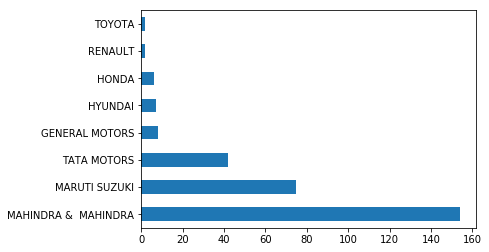

---
State: West Bengal
City: KOLKATA


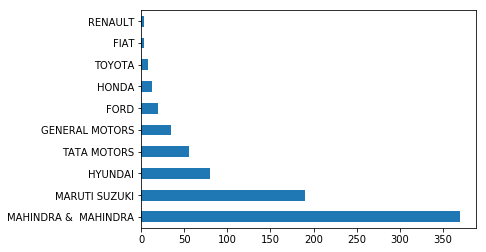

---
City: JALPAIGURI


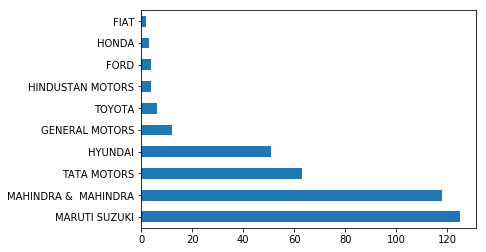

---
City: BERHAMPUR


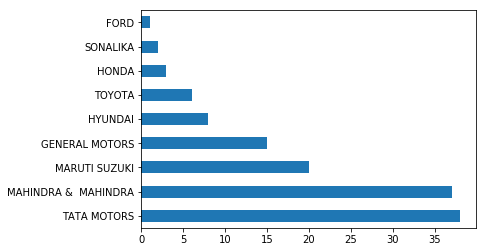

---
City: SRIRAMPUR


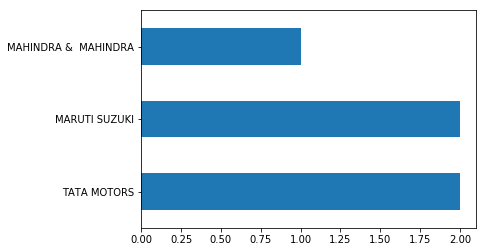

---
State: Odisha
City: BHUBANESWAR


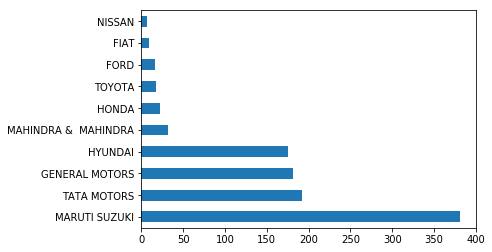

---
City: PARADEEP


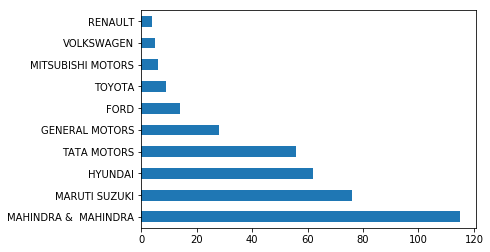

---
City: JHARSUGUDA


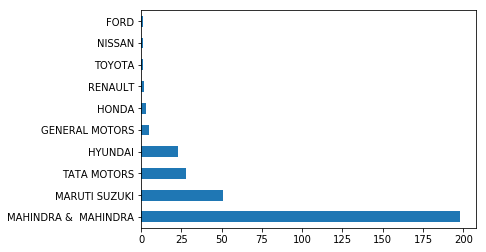

---
City: JAJPUR


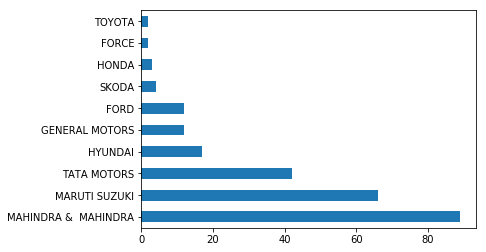

---
City: ROURKELA


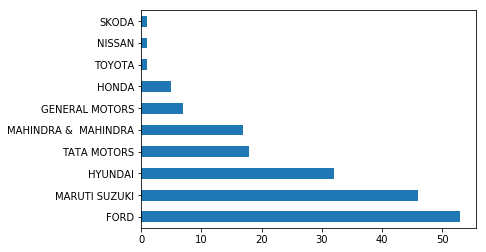

---
State: Jharkhand
City: DHANBAD


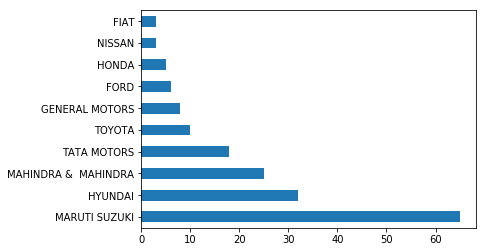

---
State: Assam
City: MANGALDOI


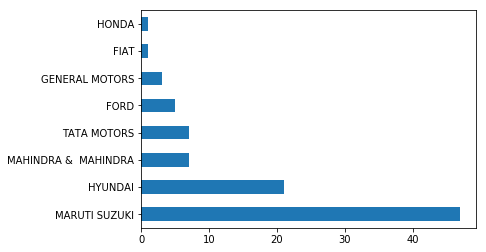

---
State: Chandigarh
City: CHANDIGARH


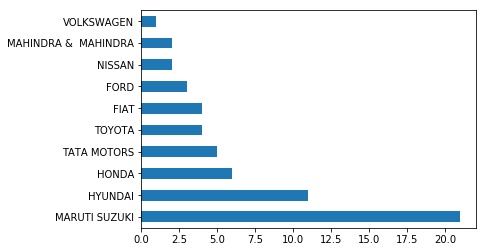

---


In [42]:
for st in invoice.plant_state.unique():
    print(f'State: {st}')
    state_trimmed = invoice[invoice.plant_state==st]
#     city_in_state = state_trimmed.plant_city.unique()
    city_in_state = list(state_trimmed.plant_city.value_counts()[:5].index)
    for ct in city_in_state:
        print(f'City: {ct}')
        temp = state_trimmed[state_trimmed.plant_city==ct]['Make'].value_counts().\
          sort_values(ascending=False)[:10] #'Model'
        temp.plot('barh')
        plt.show()
#         print(temp)
        print('---')
    print('==='*3)

In [43]:
# invoice.plant_city.unique()

### Make most profitable

In [44]:
make_revenue = invoice.groupby('Make')['Total Value'].agg(['sum','mean','count']).sort_values('sum', ascending=False)
print(make_revenue)
print('---')

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig = go.Figure(data=[
    go.Bar(name='Total Revenue', x=make_revenue.index, y=make_revenue['sum']
           , yaxis='y', offsetgroup=1
           , text = make_revenue['sum'].astype(int), textposition='outside', texttemplate='%{text:.2s}'),
    go.Bar(name='Average Revenue', x=make_revenue.index, y=make_revenue['mean']
           , yaxis='y2', offsetgroup=2, marker_color= 'mediumturquoise'#, marker_color='rgb(65,68,139)' 
           , text = make_revenue['mean'].astype(int), textposition='outside', texttemplate='%{text:.2s}')
                    ],

    layout={
        'yaxis': {'title': 'Total Revenue'},
        'yaxis2': {'title': 'Average Revenue', 'overlaying': 'y', 'side': 'right'}
    }
        )
# fig.update_layout(barmode='group')
# fig.update_traces(marker_color=['gold']*len(order_agg['Order Type']), marker_line_color='rgb(8,48,107)',
#                   marker_line_width=1.5, opacity=0.6)
fig.layout.template = 'plotly_white'
fig.update_layout(
    title={
        'text': "Total and average revenue for all Makes",
        'y':.9,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=1500,
    height=500
)    
fig.show()
# fig.write_html("/Users/Aniket/MyStuff/Study/GreyAtom/CapstoneProject/plots/Make_revenues.html")

                               sum         mean   count
Make                                                   
MAHINDRA &  MAHINDRA  3.465206e+08  3966.763483   87356
MARUTI SUZUKI         2.869446e+08  1950.650854  147102
HYUNDAI               2.043260e+08  2394.202273   85342
TATA MOTORS           1.571693e+08  2708.227793   58034
GENERAL MOTORS        7.435376e+07  2555.814534   29092
TOYOTA                6.032441e+07  3098.962867   19466
FORD                  5.932373e+07  2744.436024   21616
HONDA                 4.374210e+07  2828.640699   15464
SKODA                 2.212306e+07  3395.710692    6515
FIAT                  1.810232e+07  2812.228729    6437
VOLKSWAGEN            1.327385e+07  2158.350348    6150
NISSAN                5.036920e+06  1630.071172    3090
RENAULT               4.343421e+06  1266.672695    3429
MITSUBISHI MOTORS     3.975841e+06  2786.153525    1427
DAEWOO                9.747020e+05  2486.484643     392
BMW                   8.326550e+05  3239.902802 

In [45]:
# make_ot_revenue = invoice.groupby(['Make','Order Type'])['Total Value'].agg(['sum','mean','count']).\
# sort_values('mean', ascending=False)

for mk in make_revenue.index:
    print('Make: ',mk)
    temp = pd.DataFrame(invoice[invoice.Make == mk].groupby(['Order Type'])['Total Value'].agg(['sum','mean','count']).\
            sort_values('mean', ascending=False))
#     fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

#     fig.add_trace( go.Pie(
#                              labels=temp.index,
#                              values=temp['mean'], name = 'Average Distribution')

#                                              , row=1, col=1
#                  )
#     fig.add_trace( go.Pie(
#                              labels=temp.index,
#                              values=temp['sum'], name = 'Sum Distribution'
# #                              hole=0.5,
# #                              textposition = 'outside'
# #                              textinfo='label+percent',
# #                              marker=dict( line=dictx(color='#000000', width=2))
#                                              ), row=1, col=2
#                  )
#     fig.update_traces(hole=.5, hoverinfo="label+percent+name",
#                       textposition = 'outside',
#                       textinfo='label+percent',
#                       marker=dict( line=dict(color='#000000', width=2)))

#     fig.update_layout(
#     showlegend=True,
#     legend={
#         'x':1.25,
#         'y':.75
#             },
#     title={
#         'text': "Distribution of Order Types",
#         'y':.9,
#         'x':.4,
#         'xanchor': 'center',
#         'yanchor': 'top'},
#     autosize=False,
#     width=700,
#     height=500
#     )
# # fig.layout.template = 'plotly_dark'

#     fig.show()
    temp = temp.astype(int)
    print(temp)
#     fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
#     ax1.pie(temp['mean'],labels=temp.index,autopct = '%1.1f%%')
#     ax2.pie(temp['sum'],labels=temp.index,autopct = '%1.1f%%')
#     plt.legend(bbox_to_anchor=(1.05,0.5))
#     plt.show()
    print('\n---\n')
    

Make:  MAHINDRA &  MAHINDRA
                         sum   mean  count
Order Type                                
Accidental          94000481  13648   6887
Paid Service       117265937   4499  26064
SMC Value Package    4891111   4079   1199
Running Repairs    130109468   2715  47922
SMC Redemption        253592    135   1876
Mechanical                 0      0   2842
Repeat Order               0      0    560
WBW Order                  0      0      1
Workshop Damage            0      0      5

---

Make:  MARUTI SUZUKI
                        sum  mean  count
Order Type                              
Accidental         93882698  7921  11851
SMC Value Package   9609510  3002   3200
Paid Service       91689904  2212  41446
Running Repairs    91259629  1141  79972
SMC Redemption       498932    94   5279
Repeat Order           3966     4    928
Mechanical                0     0   4416
WBW Order                 0     0      5
Workshop Damage           0     0      5

---

Make:  HYUNDAI


                   sum  mean  count
Order Type                         
Running Repairs  24231  1730     14
Paid Service       150    50      3
Accidental           0     0      2

---

Make:  PORCHE
                  sum  mean  count
Order Type                        
Accidental       8599  4299      2
Running Repairs  2944   736      4

---

Make:  SAN MOTORS
                 sum  mean  count
Order Type                       
Running Repairs  450    75      6
Paid Service       0     0      2

---

Make:  JEEP
                 sum  mean  count
Order Type                       
Running Repairs  357    71      5
Accidental         0     0      1
Mechanical         0     0      1

---

Make:  MORRIS
                 sum  mean  count
Order Type                       
Running Repairs  353   353      1
Paid Service       0     0      1

---



In [46]:
# invoice.Model.value_counts(normalize=True)*100

In [47]:
invoice['Invoice Date'].head()

0    2015-01-02
1    2015-01-03
2    2015-01-03
3    2015-01-03
4    2015-01-03
Name: Invoice Date, dtype: object

In [48]:
invoice['Cust Type'].value_counts(dropna=False)#, normalize=True)*100

Retail              488995
Fleets                2218
Corporate others       579
Corporate- M&M         254
MFCWL                  252
Franchise               15
Insurance                1
Name: Cust Type, dtype: int64

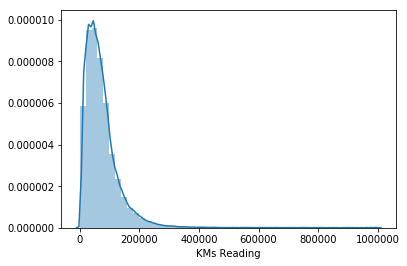

In [49]:
# KMs Reading 
# fig, ax = plt.subplots(figsize=(100,30))
sns.distplot(invoice[invoice['KMs Reading']<999999]['KMs Reading'])
# plt.show()

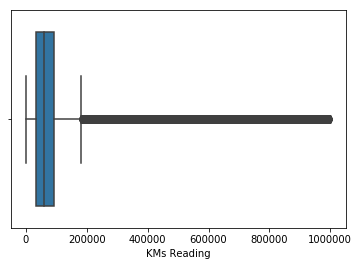

In [50]:
sns.boxplot(invoice[invoice['KMs Reading']<999999]['KMs Reading'])

In [51]:
invoice['KMs Reading'].median()

60078.5

In [52]:
invoice['JobCard Time'].head()

0    14:29:43
1    14:12:18
2    11:40:44
3    10:12:32
4    10:45:42
Name: JobCard Time, dtype: object

In [53]:
# invoice['Labour Total']

In [54]:
# plant['Sales organization'].head()

In [55]:

# plant['Valuation Area'].head()

In [56]:

# plant['Factory calendar'].head()

In [57]:
# invoice['Insurance Company'].isnull().sum()

In [58]:
# import plotly_express as px
# # df = pd.read_csv("https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/active_cases_2020-07-17_0800.csv")
# state_agg = pd.DataFrame(invoice.groupby(['plant_state'])['Total Value'].sum()).reset_index()
# print(state_agg)
# fig = px.choropleth(
#     state_agg,
#     geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
#     featureidkey='properties.ST_NM',
#     locations='plant_state',
#     color='Total Value',
#     color_continuous_scale=px.colors.sequential.Mint
# )

# fig.update_geos(fitbounds="locations", visible=False)

# fig.show()

In [59]:
# invoice.plant_city.unique()

In [60]:
# pd.DataFrame(invoice.groupby(['plant_state'])['Total Value'].sum()).reset_index()

In [61]:
import plotly
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

In [62]:
# data = [dict(type='choropleth',autocolorscale=False,
#              locations = invoice['plant_state'],
#              z=invoice['Total Value'],
#              locationmode='geojson-id',text = invoice['Total Value'],
#              colorscale = 'Viridis',
#              colorbar = dict(title='thousand dollars'))]

In [63]:
# layout = dict(title='State Spending on Public Education in $k/student',
#               geo = dict(scope='world'), #,projection = dict(type ='albers usa'
#                         showlakes =True,
#                          lakecolor='rgb(66,165,245)'))

In [64]:
# plotly.offline.iplot({
#     "data": data,
#     "layout": layout
# })

In [95]:
state_agg = pd.DataFrame(invoice.groupby(['plant_state'])['Total Value'].sum())
state_agg

Total Value
plant_state                   
Andhra Pradesh    7.541178e+07
Assam             0.000000e+00
Bihar             0.000000e+00
Chandigarh        0.000000e+00
Chhattisgarh      6.308833e+05
Gujarat           7.522049e+07
Haryana           5.638761e+07
Himachal Pradesh  2.181589e+06
Jharkhand         0.000000e+00
Karnataka         7.815735e+07
Kerala            1.674067e+07
Madhya Pradesh    4.552234e+06
Maharashtra       3.660000e+08
Odisha            0.000000e+00
Puducherry        3.617600e+06
Punjab            6.768822e+07
Rajasthan         4.513479e+05
Tamil Nadu        3.601903e+08
Telangana         9.557564e+07
Uttar Pradesh     1.005254e+08
Uttarakhand       1.384656e+05
West Bengal       0.000000e+00

In [96]:
metric = 'Total Value'
# state_agg.loc[22] = ['Jammu and Kashmir',0,'']
state_agg.loc[13,'plant_state'] = ['Orissa']

state_agg['text'] = state_agg['plant_state']+'<br>'+metric+': '+state_agg['Total Value'].astype(str)



In [97]:
# # geojson_link='https://xgist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson'
# geojson_link="https://raw.githubusercontent.com/geohacker/india/master/state/india_state.geojson"
# bg_map_color='rgba(245,245,245,1)'
# colorscale_map='Darkmint'
# #     [
# #     "#f2fffb",
# #     "#bbffeb",
# #     "#98ffe0",
# #     "#79ffd6",
# #     "#6df0c8",
# #     "#69e7c0",
# #     "#59dab2",
# #     "#45d0a5",
# #     "#31c194",
# #     "#2bb489",
# #     "#25a27b",
# #     "#1e906d",
# #     "#188463"
# #     ],



In [98]:

# fig = go.Figure(data=go.Choropleth(
#     geojson=geojson_link,
#     featureidkey='properties.NAME_1', #ST_NM NAME_1
#     locationmode='geojson-id',
#     locations=state_agg['plant_state'],
#     z=state_agg['Total Value'],


#     autocolorscale=False,
#     colorscale=colorscale_map,
#     marker_line_color='black',

#     colorbar=dict(
#         title={'text': "TOTAL REVENUE"},

#         thickness=15,
#         len=0.35,
#         bgcolor='rgba(220,220,220,0.8)',

#         tick0=0,
# #         dtick=20000,

#         xanchor='left',
#         x=.05,
#         yanchor='bottom',
#         y=0.05
#     )
#             )      
#                )

# fig.update_geos(
#     resolution=50,
#     showland=True, landcolor=bg_map_color,
#     showocean=True, oceancolor=bg_map_color,
#     visible=False,
#     projection=dict(
#         type='conic conformal',
#         parallels=[12.472944444, 35.172805555556],
#         rotation={'lat': 24, 'lon': 80}
#     ),
#     lonaxis={'range': [68, 98]},
#     lataxis={'range': [6, 38]}
# )

# fig.update_layout(
#     title=dict(
#         text="Total Value for States",
#         xanchor='center',
#         x=0.5,
#         yref='paper',
#         yanchor='bottom',
#         y=0.9,
#         pad={'b': 10}
#     ),
# #     text=state_agg['text'],
#     margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
#     height=700,
#     width=700
# )

# fig.show()

In [99]:
# fig.data[0]

In [100]:
# plant.groupby('State')['Plant'].nunique().sort_values()

In [101]:
# invoice.groupby('plant_state')['Plant'].nunique().sort_values()

In [102]:
invoice['Plant'].nunique() #438

242

In [103]:
invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492314 entries, 0 to 492313
Data columns (total 38 columns):
Area / Locality        468424 non-null object
CITY                   492313 non-null object
Cash /Cashless Type    27420 non-null object
Claim No.              4804 non-null object
Cust Type              492314 non-null object
Customer No.           492314 non-null object
District               492314 non-null object
Expiry Date            22231 non-null object
Gate Pass Date         40915 non-null object
Gate Pass Time         492314 non-null object
Invoice Date           492314 non-null object
Invoice No             492314 non-null int64
Invoice Time           492314 non-null object
Job Card No            492314 non-null int64
JobCard Date           492314 non-null object
JobCard Time           492314 non-null object
KMs Reading            492314 non-null int64
Labour Total           492314 non-null float64
Make                   492314 non-null object
Misc Total            

In [104]:
invoice['Invoice Date']= pd.to_datetime(invoice['Invoice Date'])

In [105]:
invoice['Invoice Date'].min()

Timestamp('2012-04-02 00:00:00')

In [106]:
invoice['Invoice Date'].max()

Timestamp('2016-10-31 00:00:00')

In [107]:
invoice['invoice_month'] = invoice['Invoice Date'].map(lambda x:x.month)
invoice['invoice_year'] = invoice['Invoice Date'].map(lambda x:x.year)

In [108]:
invoice.invoice_year.unique()

array([2015, 2014, 2012, 2013, 2016])

In [109]:
# invoice.invoice_month.value_counts()

In [110]:
map_dash = invoice[['Make', 'Model', 'Plant', 'Plant Name1', 'plant_city',
                    'plant_state', 'Invoice Date', 'Order Type',
                    'Technician Name', 'Total Value',
                   'invoice_month', 'invoice_year']].copy()

In [111]:
map_dash.to_csv('/Users/Aniket/MyStuff/Study/GreyAtom/CapstoneProject/GA_Capstone_Dash/data/dash_invoice.csv')

In [112]:
temp = invoice[invoice['Plant']=='BC01'].groupby(['invoice_year','invoice_month'])['Total Value'].sum().reset_index().sort_values(['invoice_year','invoice_month'])
temp['monthyyyy'] = temp['invoice_month'].astype(str) + ' ' + temp['invoice_year'].astype(str)


In [113]:
# temp

In [114]:
# pl='BC04'
# # timeplot_year='All'
# timeplot_year=2016
# timeplot_mode='Order type'
# plant_callback = invoice[invoice['Plant']==pl]\
#             [['Plant', 'Invoice Date', 'invoice_month', 'invoice_year', 'Order Type', 'Total Value']]
# plant_callback.rename(columns={'Total Value': 'Revenue (INR)'}, inplace=True)
# plant_year_list = plant_callback.invoice_year.unique()
# if timeplot_year != 'All':
#     if timeplot_year not in plant_year_list:
#         print('not found')
#     else:
#         plant_callback = plant_callback[plant_callback['invoice_year'] == int(timeplot_year)]
#         print(plant_callback.head(10))

#         if timeplot_mode=='Order type':
#     # plot = plant_callback.groupby(['Invoice Date', 'Order Type'])\
#             plot = plant_callback.groupby(['invoice_year', 'invoice_month', 'Invoice Date', 'Order Type'])\
#             ['Revenue (INR)'].sum().reset_index().sort_values(['invoice_year', 'invoice_month'])
#         # .sort_values(['Invoice Date'])
#             timeplot_fig = px.line(plot, x="Invoice Date", y="Revenue (INR)", color="Order Type",\
#                            line_group="Order Type", hover_name="Invoice Date")



#             timeplot_fig.show()


In [115]:
# invoice.to_csv('/Users/Aniket/MyStuff/Study/GreyAtom/CapstoneProject/data/invoice_refined.csv')